## Machine Learning Assignent - 1

##### by Piyush Sanghi

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection, linear_model, metrics

### Part A - Data cleansing and exploration

###### Import full data set using Pandas

In [2]:
df = pd.read_csv('C:/Users/Piyush/Dropbox/MScA/machine_learning/assignment_1/bottle.csv')

C:\Users\Piyush\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###### Verify that the shape is: (864863, 74)

In [3]:
df.shape

(864863, 74)

###### For the full dataset, remove all NaN and NA values (Hint: Pandas has a method for this) 

In [4]:
#Subsetting the dataframe by keeping columns which are needed
df = df.loc[:, ['T_degC', 'Salnty', 'STheta']]
df.dropna(inplace=True)

In [5]:
df.shape

(812174, 3)

In [6]:
df.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


###### Build the following plots using matplotlib

a) Scatter: Salnty vs T_degC

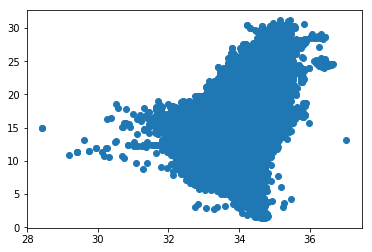

In [7]:
plt.pyplot.scatter(df.Salnty, df.T_degC)

b) Scatter: STheta vs T_degC

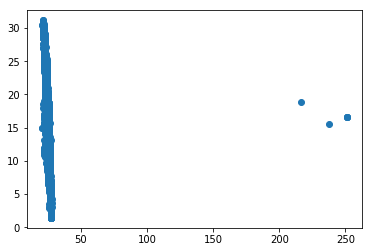

In [8]:
plt.pyplot.scatter(df.STheta, df.T_degC)

^^^

There seems to be some extreme outliers in STheta

###### Build the following plot using seaborn:
  a) Distribution of T_degC (hint: distplot will be helpful here)

C:\Users\Piyush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


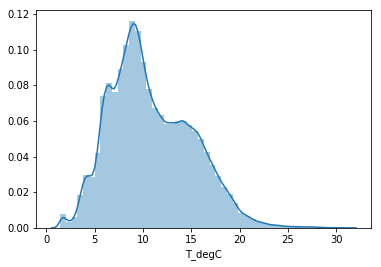

In [9]:
sns.distplot(df.T_degC)

###### Remove obvious outliers from step 3b:

In [10]:
df = df[df.STheta < 50]
df.shape

(812168, 3)

###### Plot 3b again – does it look better? Explain!

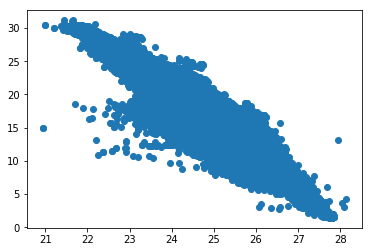

In [11]:
plt.pyplot.scatter(df.STheta, df.T_degC)

Yes, the plot looks better and different. In the previous plot - with outliers - buckets were created in multiples of 50. Due to this the plot looked like a straight line, however after removing the outliers, we see an entirely different plot. The plot now indicates a negative correlation between "STheta" and "T_degC", i.e. T_degC decreases with increase in STheta.

### Part B: Train & Test Split:

###### Build out the following: 
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df[['Salnty', 'STheta']], 
    df['T_degC'], 
    test_size=0.3, 
    random_state=10
)

In [13]:
print("X_train shape:{0}\ny_train shape:{1}\nX_test shape:{2}\ny_test shape:{3}\n".format(
    X_train.shape, 
    y_train.shape, 
    X_test.shape, 
    y_test.shape
    )
)

X_train shape:(568517, 2)
y_train shape:(568517,)
X_test shape:(243651, 2)
y_test shape:(243651,)



#### Part C: Linear Regression Using Normal Equation - Coded In Python

###### Build the normal equation using numpy & fit using your training data (X_train & y_train).
Note: Make sure to include an intercept value of 1 for every observation in your X_train.

In [14]:
X = np.c_[np.ones((X_train.shape[0], 1)), X_train] # add x0 = 1 to each instance
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)

###### Print out the coefficients - we will need to compare these to the output in Part 4

In [15]:
print("Coefficients: {0}\nIntercept: {1}".format(theta[1:], theta[0]))

Coefficients: [ 3.10636663 -5.03713141]
Intercept: 35.7682995011575


###### Predict T_degC for the test data using the fitted values in b.

In [16]:
X = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_predict = X.dot(theta)

###### Calculate the following for the test data:
- mean squared error
- r-squared
- explained variance

In [17]:
#Mean Square Error
mean_square_error = np.mean((y_test - y_predict)**2)

#r-squared
SST = np.sum((y_test - np.mean(y_test))**2)
SSE = np.sum((y_predict - np.mean(y_test))**2)
r_square = SSE/SST

#explained variance
explained_variance = 1 - (np.var(y_test - y_predict)/np.var(y_test))

print("Mean Square Error: {0}\nr-squared: {1}\nExplained Variance: {2}".format(mean_square_error, r_square, explained_variance))

Mean Square Error: 0.23486673361767652
r-squared: 0.9869421379074553
Explained Variance: 0.9868212195273064


###### Create scatterplot that shows actual versus predicted values for the T_degC

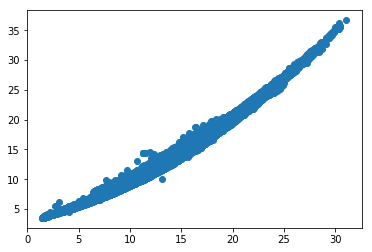

In [18]:
plt.pyplot.scatter(y_test, y_predict)

#### Part D: Using sklearn API

###### Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

In [19]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Print out the coefficients (including the intercept)

In [20]:
print("Coefficients: {0}\nIntercept: {1}".format(lin_reg.coef_, lin_reg.intercept_))

Coefficients: [ 3.10636663 -5.03713141]
Intercept: 35.76829950154387


###### Predict T_degC for the test data using the fitted values in b

In [21]:
y_pred = lin_reg.predict(X_test)

###### Calculate the following for the test data:
- mean squared error
- r-squared
- explained variance

In [22]:
mean_square_error = metrics.mean_squared_error(y_test, y_pred)

r_square = metrics.r2_score(y_test, y_pred)

explained_variance = metrics.explained_variance_score(y_test, y_pred)

print("Mean Square Error: {0}\nr-squared: {1}\nExplained Variance: {2}".format(mean_square_error, r_square, explained_variance))

Mean Square Error: 0.234866733617699
r-squared: 0.9868212014844816
Explained Variance: 0.9868212195273063


###### Create a scatterplot that shows actual versus predicted values for the T_degC

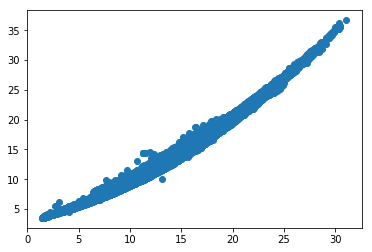

In [23]:
plt.pyplot.scatter(y_test, y_pred)